# MODELO: Holt-Winters

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import glob

#### 1. Cargamos los datos

In [3]:
# Get a list of all CSV files in the directory
csv_files = glob.glob('predictions_dia_avg/predictions_0.csv/*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df_temp = pd.read_csv(file)
    dfs.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Optional: Reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)

df.head()


df = df.rename(columns={'day': 'ds', 'avg_all_users': 'y'})

# Asumiendo que tu DataFrame se llama 'df'

# Primero, asegúrate de que 'ds' es de tipo datetime
df['ds'] = pd.to_datetime(df['ds'])

# Luego, elimina la información de zona horaria
df['ds'] = df['ds'].dt.tz_localize(None)

# Verifica el tipo de datos de la columna 'ds'
print(df['ds'].dtype)

df.head()

datetime64[ns]


,ds,y
0,2019-09-30,0.031848
1,2019-10-01,0.037974
2,2019-10-02,0.039463
3,2019-10-03,0.039074
4,2019-10-04,0.042678


In [4]:
df['ds'] = pd.to_datetime(df['ds'])

df_data_train_mid = df[df["ds"] < "2024-01-01 00:00:00"]
df_data_test_final = df[df["ds"] >= "2024-01-01 00:00:00"] 

# Los datos de test contienen diciembre, enero, febrero, marzo y 15 días de abril

In [5]:
df_data_train = df_data_train_mid[df_data_train_mid["ds"] < "2023-12-01 00:00:00"]
df_data_test = df_data_train_mid[df_data_train_mid["ds"] >= "2023-12-01 00:00:00"] # Mes de diciembre 2023

#### 2. Entrenamiento y evaluación

MAE: 0.0012
RMSE: 0.0016
MAPE: 9.22%


/home/consumo_agua/project/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


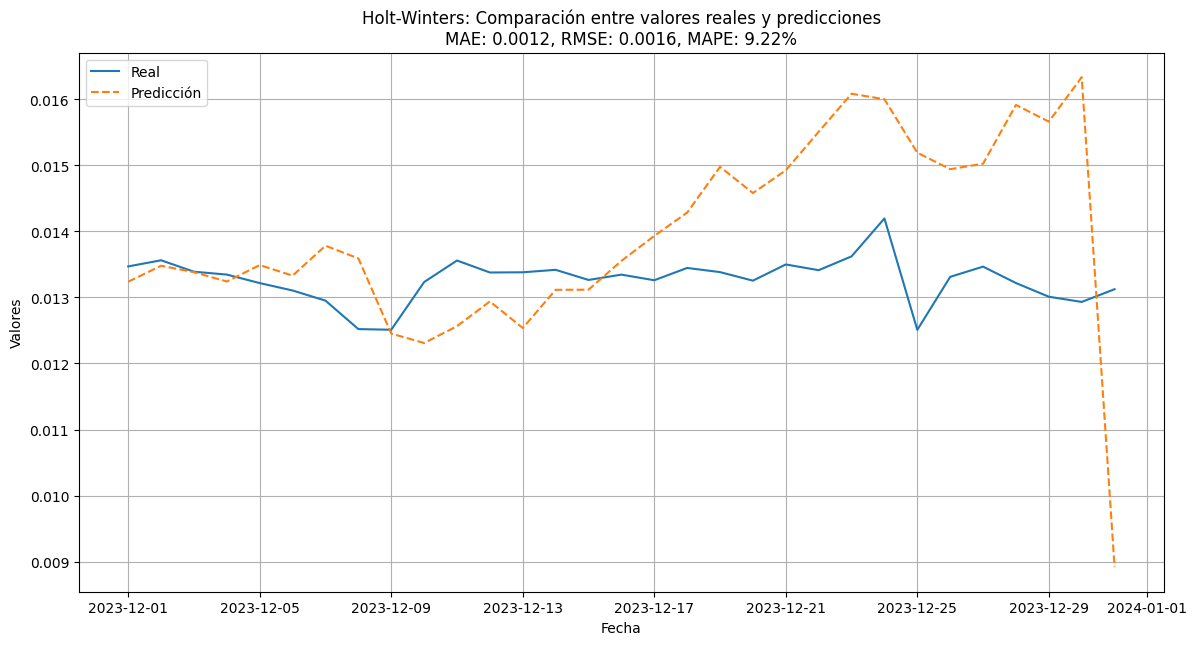

In [6]:
# Extraemos las series de tiempo para entrenar y probar
train_y = df_data_train["y"]
test_y = df_data_test["y"]

# Entrenamiento del modelo Holt-Winters
# Configuración: aditiva o multiplicativa según los datos (puedes probar ambas)
model = ExponentialSmoothing(
    train_y, 
    trend="add",       # Ajusta la tendencia: "add" (aditiva) o "mul" (multiplicativa)
    seasonal="add",    # Ajusta la estacionalidad: "add" o "mul"
    seasonal_periods=365  # Periodo de estacionalidad (ej: 365 días para datos diarios)
)
hw_model = model.fit()

# Predicción en el conjunto de prueba
y_pred = hw_model.forecast(steps=len(test_y))

# Calcular métricas de error (MAE, RMSE, MAPE)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred, squared=False)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_y, y_pred)

# Resultados de las métricas
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

# Crear DataFrame final con las predicciones y valores reales
results_df = pd.DataFrame({
    "ds": df_data_test["ds"],
    "y_real": test_y.values,
    "y_pred": y_pred
})

# Graficar valores reales vs predicciones
plt.figure(figsize=(14, 7))
plt.plot(results_df["ds"], results_df["y_real"], label="Real")
plt.plot(results_df["ds"], results_df["y_pred"], label="Predicción", linestyle="--")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.title(f"Holt-Winters: Comparación entre valores reales y predicciones\nMAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")
plt.legend()
plt.grid()
plt.show()

# # Guardar resultados en un archivo CSV
# results_df.to_csv("resultados_holt_winters.csv", index=False)

DATOS USUARIOS CONCRETOS

In [7]:
# Get a list of all CSV files in the directory
csv_files = glob.glob('data_testing/cluster_0_filter_users.csv/*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df_temp = pd.read_csv(file)
    dfs.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Optional: Reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)

df_users = df.rename(columns={'day': 'ds', 'avg_value': 'y'})

# Asumiendo que tu DataFrame se llama 'df'

# Primero, asegúrate de que 'ds' es de tipo datetime
df_users['ds'] = pd.to_datetime(df_users['ds'])

# Luego, elimina la información de zona horaria
df_users['ds'] = df_users['ds'].dt.tz_localize(None)

# Verifica el tipo de datos de la columna 'ds'
print(df_users['ds'].dtype)

df_users.head()

datetime64[ns]


,ds,serial_number,y
0,2021-09-08,J18YA009425,0.000167
1,2021-09-08,J18YA009432,0.006708
2,2021-09-08,J18YA009438,0.001708
3,2021-09-08,J18YA009463,0.021708
4,2021-09-08,J18YA009467,0.013609


In [8]:
df_data_train_mid = df_users[df_users["ds"] < "2024-01-01 00:00:00"]
df_data_test_final = df_users[df_users["ds"] >= "2024-01-01 00:00:00"] 

df_data_train_user = df_data_train_mid[df_data_train_mid["ds"] < "2023-12-01 00:00:00"]
df_data_test_user = df_data_train_mid[df_data_train_mid["ds"] >= "2023-12-01 00:00:00"] # Mes de diciembre 2023

In [12]:
# Filtrar por serial_number de interés
serial_to_predict = "J18YA006166"  # Serial que quieres predecir
df_filtered = df_data_test_user[df_data_test_user['serial_number'] == serial_to_predict]

In [14]:
test_y = df_filtered["y"]

# Predicción en el conjunto de prueba
y_pred = hw_model.forecast(steps=len(test_y))

# Calcular métricas de error (MAE, RMSE, MAPE)
mae = mean_absolute_error(test_y, y_pred)
rmse = mean_squared_error(test_y, y_pred, squared=False)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_y, y_pred)

# Resultados de las métricas
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")



MAE: 0.0068
RMSE: 0.0073
MAPE: 115.11%


/home/consumo_agua/project/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
# Restablecer los índices de las tres variables involucradas
df_filtered = df_filtered.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)

# Verificar las longitudes después de restablecer los índices
print(len(df_filtered["ds"]), len(test_y), len(y_pred))

# Ahora puedes crear el DataFrame sin problemas
results_df = pd.DataFrame({
    "ds": df_filtered["ds"],
    "y_real": test_y.values,
    "y_pred": y_pred
})


31 31 31


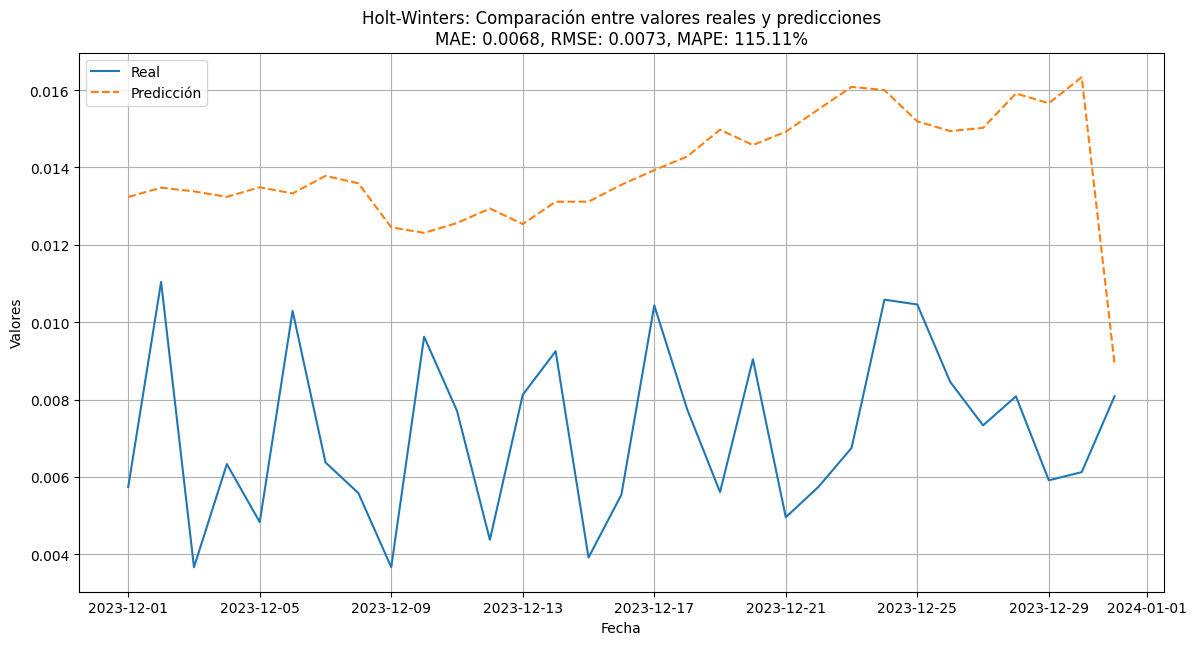

In [25]:
# Graficar valores reales vs predicciones
plt.figure(figsize=(14, 7))
plt.plot(results_df["ds"], results_df["y_real"], label="Real")
plt.plot(results_df["ds"], results_df["y_pred"], label="Predicción", linestyle="--")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.title(f"Holt-Winters: Comparación entre valores reales y predicciones\nMAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")
plt.legend()
plt.grid()
plt.show()